In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
# Define image dimensions and batch size
img_width, img_height = 224, 224

In [3]:
# Define the number of classes
num_classes = 56
train_dir='data'
val_dir='data'

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [6]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Generate the training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

# Generate the validation data
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Found 3360 images belonging to 56 classes.
Found 3360 images belonging to 56 classes.


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
# Train the model
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/10
105/105 [==============================] - 297s 3s/step - loss: 0.1330 - accuracy: 0.9613 - val_loss: 0.0385 - val_accuracy: 0.9902
Epoch 2/10
105/105 [==============================] - 287s 3s/step - loss: 0.1250 - accuracy: 0.9634 - val_loss: 0.0140 - val_accuracy: 0.9958
Epoch 3/10
105/105 [==============================] - 277s 3s/step - loss: 0.1010 - accuracy: 0.9705 - val_loss: 0.0930 - val_accuracy: 0.9744
Epoch 4/10
105/105 [==============================] - 278s 3s/step - loss: 0.1194 - accuracy: 0.9652 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/10
105/105 [==============================] - 284s 3s/step - loss: 0.1310 - accuracy: 0.9628 - val_loss: 0.0708 - val_accuracy: 0.9804
Epoch 6/10
105/105 [==============================] - 283s 3s/step - loss: 0.1378 - accuracy: 0.9598 - val_loss: 0.0215 - val_accuracy: 0.9952
Epoch 7/10
105/105 [==============================] - 287s 3s/step - loss: 0.1227 - accuracy: 0.9646 - val_loss: 0.0312 - val_accuracy: 0.9946

In [15]:
from matplotlib import pyplot as plt

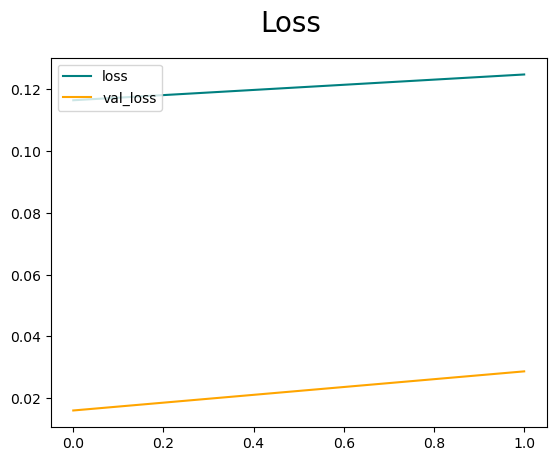

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

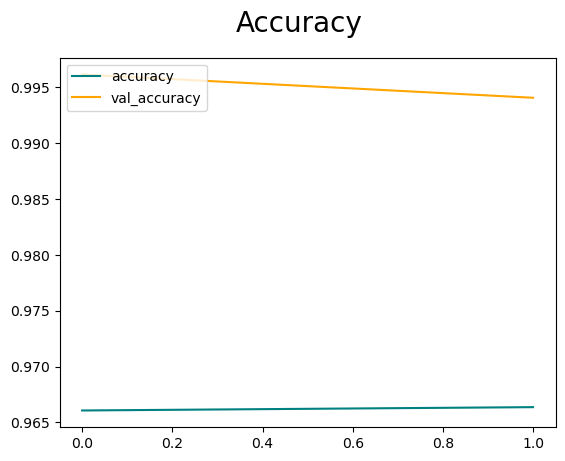

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(train_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

105/105 [==============================] - 96s 910ms/step - loss: 0.0408 - accuracy: 0.9917
Test loss: 0.04082193970680237
Test accuracy: 0.9916666746139526


In [43]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '1.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # resizing to 224x224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # scaling pixel values to [0,1]

# Generate predictions
preds = model.predict(x)

# Print the predicted class for the image
class_names = ['antelope', 'badger', 'bat', 'bear', 'bison', 'boar', 'cat', 'chimpanzee', 'cow', 'coyote', 'deer', 'dog', 'donkey', 'duck', 'elephant', 'flamingo', 'fox', 'goat', 'goose', 'gorilla', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'kangaroo', 'koala', 'leopard', 'lion', 'okapi', 'orangutan', 'owl', 'ox', 'panda', 'parrot', 'pelecaniformes', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'reindeer', 'rhinoceros', 'sandpiper', 'sheep', 'snake', 'squirrel', 'tiger', 'turkey', 'wolf', 'wombat', 'woodpecker', 'zebra']
print('Predicted class:', class_names[np.argmax(preds)])


1/1 [==============================] - 1s 862ms/step
Predicted class: bison


In [40]:
from tensorflow.keras.models import load_model

In [32]:
import os
model.save(os.path.join('models','wildclassifier.h5'))

In [35]:
new_model = load_model('models/wildclassifier.h5')


In [36]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


array([[3.44463333e-05, 2.46258178e-08, 1.01091355e-04, 1.92314360e-07,
        1.19898777e-05, 1.79509385e-07, 2.86996237e-06, 8.23549854e-05,
        9.24640801e-04, 2.15439632e-05, 7.12522524e-05, 5.89059157e-09,
        2.54802842e-07, 2.20036236e-05, 8.57327052e-07, 1.11297204e-03,
        7.92518858e-06, 2.63185427e-07, 5.46339606e-07, 6.95991694e-05,
        6.70466470e-05, 1.90128958e-05, 3.77983059e-04, 2.58474529e-07,
        2.54629209e-04, 7.30164174e-05, 2.17160839e-03, 2.09385439e-06,
        5.63106092e-04, 1.50100477e-05, 2.01103523e-01, 2.83691206e-05,
        2.02607534e-05, 4.32845400e-06, 4.40818280e-01, 3.92109250e-05,
        1.01841233e-05, 3.11690215e-02, 2.69895396e-03, 7.31048317e-07,
        5.07893087e-03, 2.37454511e-02, 5.70966790e-07, 7.83119867e-06,
        2.96848291e-03, 8.87539557e-07, 4.54580002e-02, 2.49237419e-05,
        9.06265086e-07, 2.31642716e-05, 2.30383892e-02, 2.83140391e-02,
        1.33511344e-08, 1.08373195e-06, 3.21852453e-02, 1.572504

In [37]:
new_model